In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
# importing the cleaned dataset of algerian foreset fire for model trainig 
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset_UPDATE.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
# droping the 'day', 'month', 'year' feature for the model training:
df.drop(['day', 'month', 'year'],axis = 1 ,inplace =True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
# uniques values in clasee feature
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
'''
it showing that there are specificly two category 1st fire and 2nd not fire, but as we can see there are some values
that should not is different they added in different ways so that they create diffrennt category.

now we combaine all these data into in two specific category like fire or not fire, 
'''

df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
# for combaine these into two we did encoding there.
'''
# in this we encoded not fire with 0 and fire with 1 
'''
df['Classes'] = df['Classes'].astype(str)     
df['Classes'] = np.where(df['Classes'].str.contains('not fire','fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [10]:
df['Classes'].value_counts()          # now all values are encoded

1    137
0    106
Name: Classes, dtype: int64

In [11]:
# independent and dependent features
x = df.drop('FWI',axis = 1)
y = df['FWI']

In [12]:
y 

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

In [14]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [15]:
# feature selection based on correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


# Feature Selection 

- Multicollinearity: Multicollinearity in feature selection for machine learning refers to a situation where two or more features in your dataset are highly correlated with each other. This high correlation can create problems when building predictive models because it becomes difficult to distinguish the individual effect of each feature on the target variable.

<AxesSubplot: >

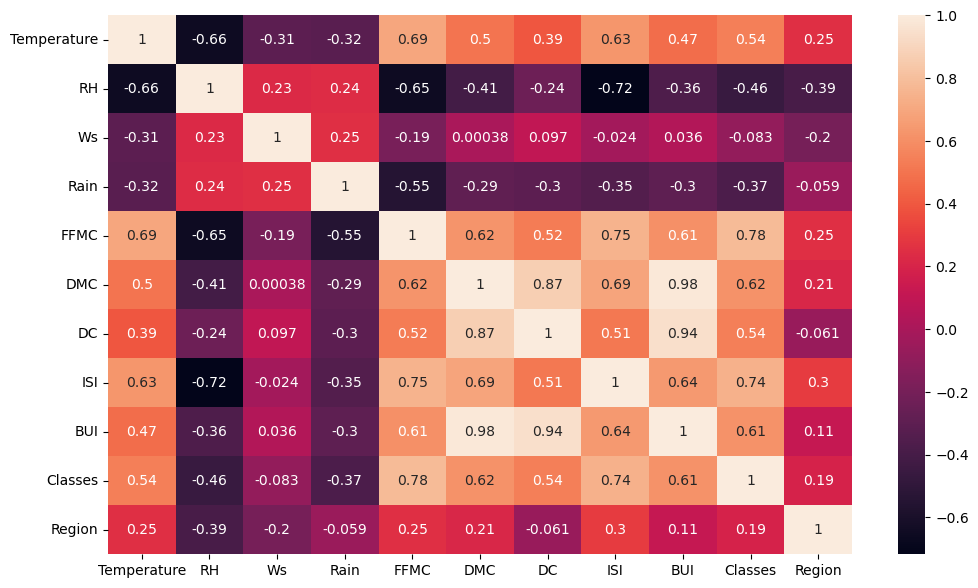

In [16]:
# check for multicollinearity
plt.figure(figsize=(12,7))
corr = x_train.corr()
sns.heatmap(corr,annot= True)

In [17]:
# corr of x_train dataset
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [18]:
# now we abstract indepent correlated fatures who is not useful for our model.
# feature selection

def correlation(dataset, threshold):
    col_corr = set()             # using set so that values not repeat
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
# threshold --> done by Domain expertise:
# now calling the function that we create:
corr_features = correlation(x_train,0.85)

In [20]:
corr_features         # these two has correlated more then threshold so drop it.

{'BUI', 'DC'}

In [21]:
# dropping the correlation who has more then 0.85 
x_train.drop(corr_features,axis = 1,inplace = True)
x_test.drop(corr_features,axis = 1 ,inplace = True)

In [22]:
# now check the shape of the train test data:
x_train.shape, x_test.shape

((182, 9), (61, 9))

# Feature selction Or Standardlization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit transform the x-train data 
x_train_scaled = scaler.fit_transform(x_train)

# transforn the x-test data 
x_test_scaled = scaler.transform(x_test)

In [24]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

# Box plot to Understand Effect of Standard Scaler

/tmp/ipykernel_113/2003911211.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x-train after scalling')

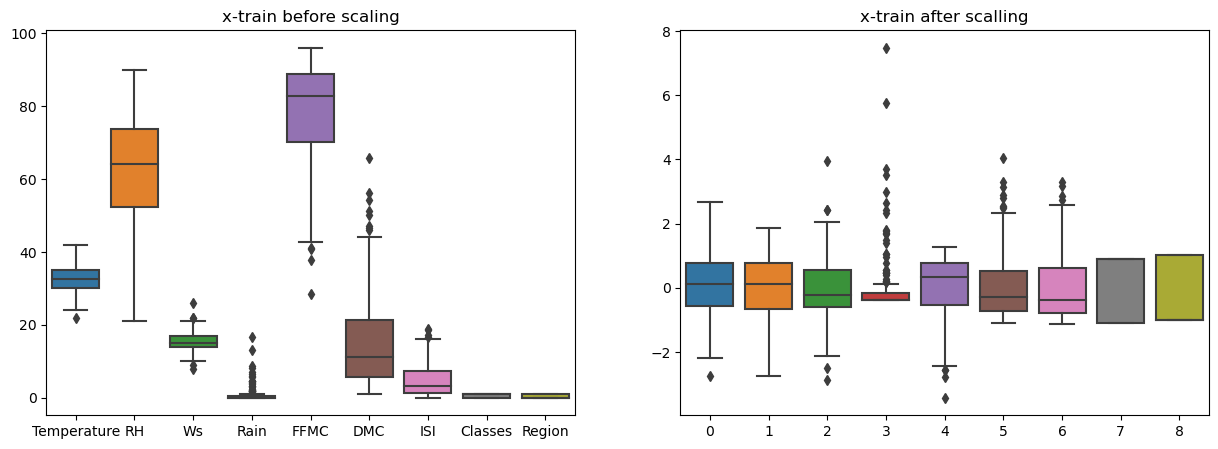

In [25]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title('x-train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaled)
plt.title('x-train after scalling')

# Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error    # there are outliers present
from sklearn.metrics import r2_score

linreg = LinearRegression()
# fit the x-train ,y-train 
linreg.fit(x_train_scaled,y_train)

#predict the x-test scaled
y_pred = linreg.predict(x_test_scaled)

# MEA:
mea = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)          # accuracy check

print('MEA is :', mea)
print('R_square is: ', score)

MEA is : 0.5468236465249985
R_square is:  0.9847657384266951


# Lasso Regression

In [27]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

#initialize the lasso 
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred = lasso.predict(x_test_scaled)

mea = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)

print('MEA is:',mea)
print('R-square is :', score)

MEA is: 1.133175994914409
R-square is : 0.9492020263112388


# Ridge Regression model

In [28]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score 

ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)

mea = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)

print('MEA is: ', mea)
print('R-Square is: ', score)

MEA is:  0.5642305340105692
R-Square is:  0.9842993364555513


# Elascticnet Regression model :

In [29]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elsnet = ElasticNet()
elsnet.fit(x_train_scaled,y_train)
y_pred = elsnet.predict(x_test_scaled)

mea = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test, y_pred)

print('MEA is:',mea)
print('R-Square is:', score)

MEA is: 1.8822353634896005
R-Square is: 0.8753460589519703


In [30]:
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))